In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
bikedata=pd.read_csv("day.csv")
bikedata.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [6]:
bikedata.shape

(730, 16)

In [7]:
bikedata.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


####Cleaning of data

In [9]:
bikedata1= bikedata.drop(['instant','dteday'], axis=1)
bikedata1.shape

(730, 14)

In [10]:
bikedata1.size

10220

In [11]:
bikedata1.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
bikedata1.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'cnt'],
       dtype='object')]

In [13]:
# Dropping casual amd registered column as we are considering cnt: total of these both columns for the analysis
bikedata1.drop(['casual','registered'],axis=1, inplace=True)

In [14]:
bikedata1.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [15]:
bikedata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [16]:
# find out the value of each season
bikedata1.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [17]:
# find out the value of each weather 1,2,3,4
bikedata1.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [18]:
# computing correlation for each other variables
bikedata1.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868  0.004012   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195  0.000685   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905 -0.004059   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.020145   
weekday     4.012478e-03  6.852851e-04 -4.059002e-03 -0.020145  1.000000   
workingday  1.786841e-02 -1.185197e-02 -1.041372e-02 -0.257009  0.001588   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.034216   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764  0.044876   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703  0.037964   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662  0.008780   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257 -0.017230   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.036183   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.017868    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.011852   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.010414    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.257009   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.001588    0.034216  0.044876  0.037964  0.008780  -0.017230   
workingday    1.000000   -0.026332  0.002044  0.010657  0.053770  -0.002453   
weathersit   -0.026332    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.002044   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.010657   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.053770    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.002453    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt          -0.027640   -0.295929  0.627044  0.630685 -0.098543  -0.235132   

                 cnt  
season      0.404584  
yr          0.569728  
mnth        0.278191  
holiday    -0.068764  
weekday     0.036183  
workingday -0.027640  
weathersit -0.295929  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
cnt         1.000000

<AxesSubplot:>

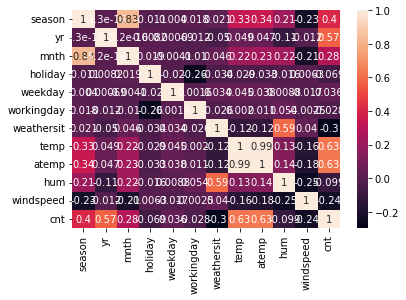

In [19]:
sns.heatmap(bikedata1.corr(),annot=True)

In [20]:
bikedata1.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [21]:
## Check outliers
bikedata1.columns


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [22]:
# printing unique values in all columns
bikedata1.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

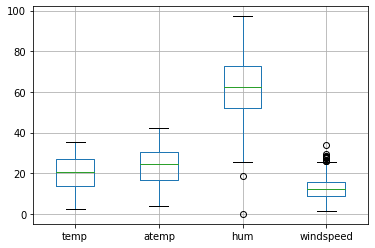

In [23]:
# let us chart box plot for independent variables to know about outliers if any
bikedata1_bplt = bikedata1.boxplot(column = [
    'temp',
    'atemp',
    'hum',
    'windspeed',
])
bikedata1_bplt.plot()
plt.show()

In [24]:
## convert the season and weathersit into categorical from numeric values
bikedata1.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)

In [25]:
bikedata1.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace=True)

In [26]:
bikedata1.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)

In [27]:
bikedata1.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)

In [28]:
bikedata1.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1   moderate  14.110847   
1  spring   0  jan        0     tue           1   moderate  14.902598   
2  spring   0  jan        0     wed           1       good   8.050924   
3  spring   0  jan        0     thu           1       good   8.200000   
4  spring   0  jan        0     fri           1       good   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## Chk Linear relationship

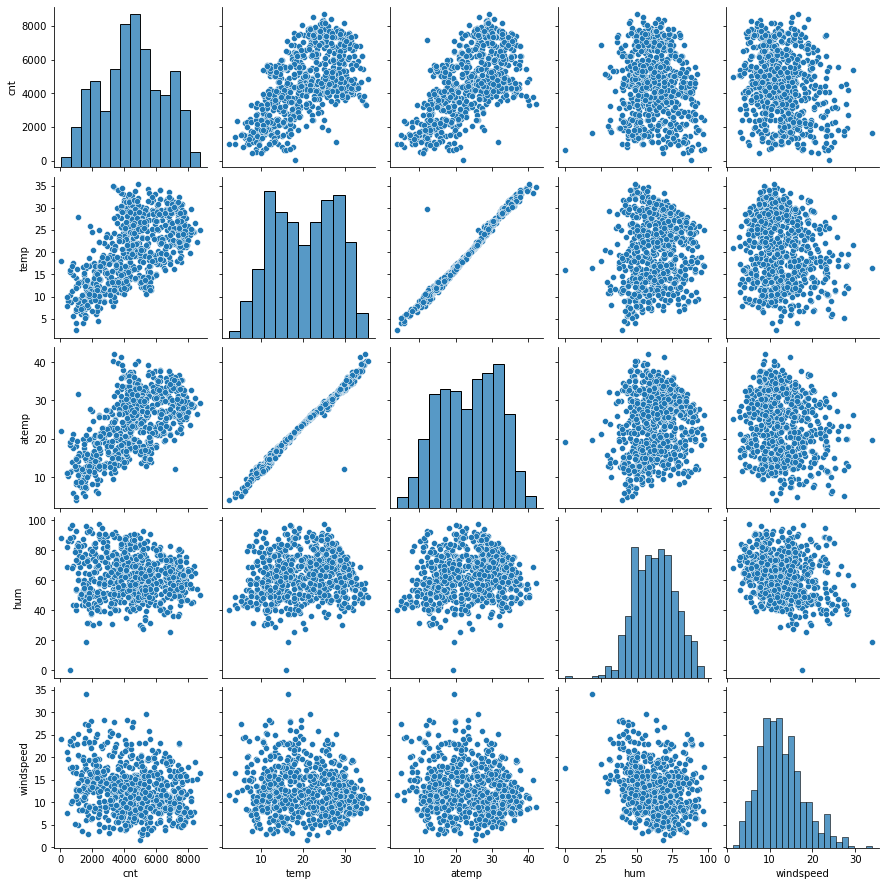

In [29]:
# let us check linear relationship drawing pairplots
sns.pairplot(data=bikedata1,
             vars=['cnt', 'temp','atemp','hum','windspeed'],
             )
plt.show()

### Inference
temp and cnt is not sctattered too much. They all apear near to the line.
atemp and cnt also is not scattered and fall near to line
So we can infer temp and atemp are highly correlated with cnt

In [30]:
bikedata1.corr()

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -0.011852 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        0.048789 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.010657  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764   -0.027640  0.627044  0.630685 -0.098543   

            windspeed       cnt  
yr          -0.011624  0.569728  
holiday      0.006257 -0.068764  
workingday  -0.002453 -0.027640  
temp        -0.158186  0.627044  
atemp       -0.183876  0.630685  
hum         -0.248506 -0.098543  
windspeed    1.000000 -0.235132  
cnt         -0.235132  1.000000

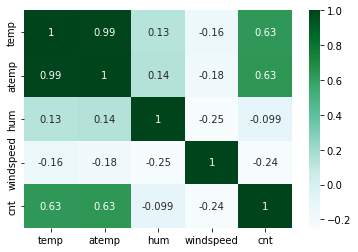

In [31]:
# Checking continuous variables relationship with each other
sns.heatmap(bikedata1[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

### Heatmap for correlation between variables

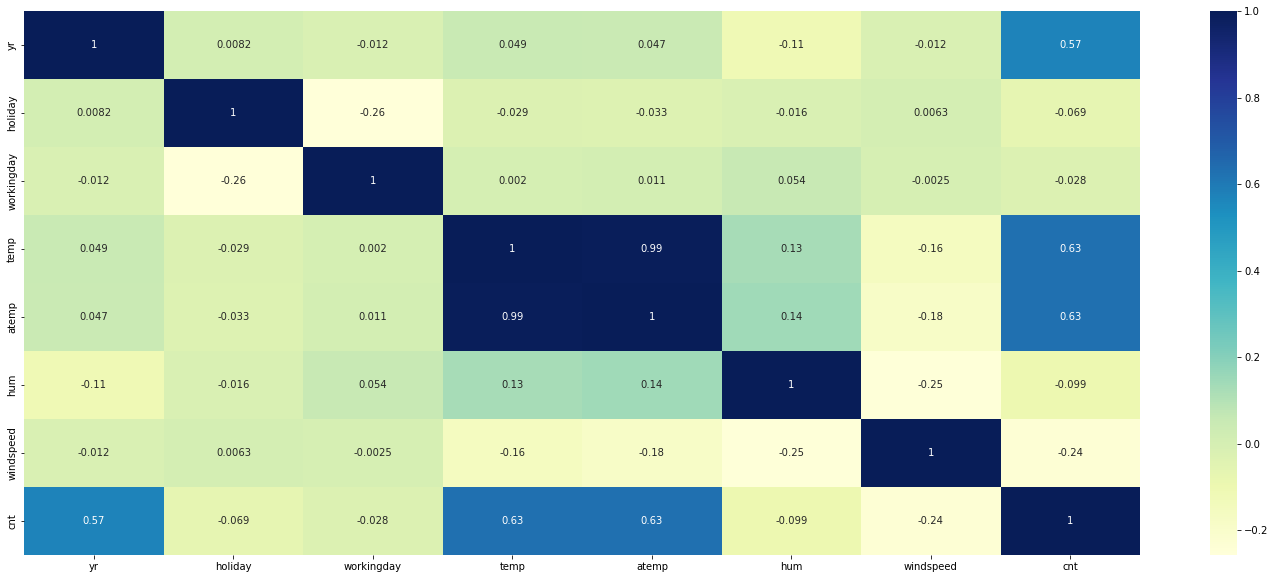

In [32]:
#Calculate Correlation
corr = bikedata1.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

### Assignment based subjective questions
Analysis of categorical variables from dataset on dependent variables
categorical variables are yr, holiday, workingday,weekday,season, mth,weathersit

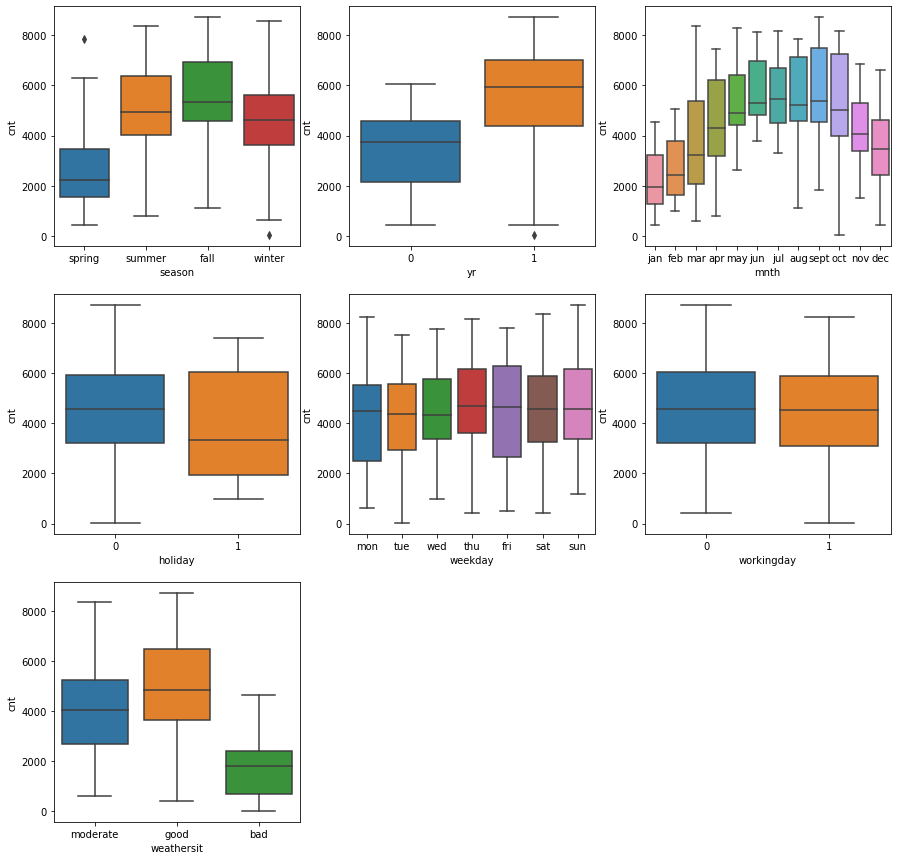

In [33]:
## Boxplot for categorical variables
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikedata1, x=i[1], y='cnt')
plt.show()

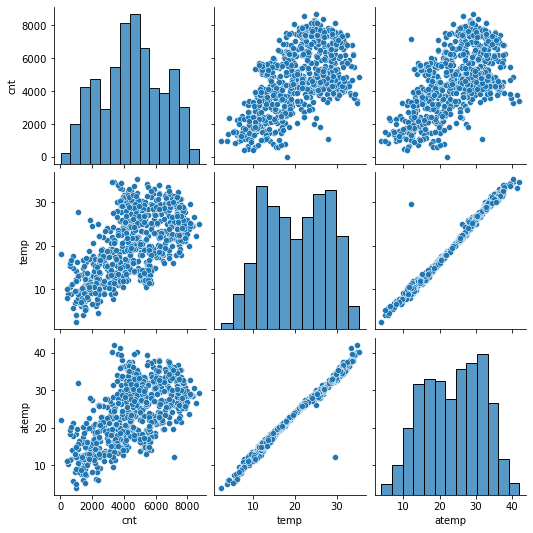

In [34]:
sns.pairplot(data=bikedata1,
             vars=['cnt', 'temp','atemp']
             )
plt.show()

## Preparing data for linear regression
### step 1: Create dummy variables

In [35]:
bikedata1 = pd.get_dummies(data=bikedata1,columns=["season","mnth","weekday"],drop_first=True)
bikedata1 = pd.get_dummies(data=bikedata1,columns=["weathersit"])

In [36]:
bikedata1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [37]:
bikedata1.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
0              1              0  ...          0            1            0   
1              1              0  ...          0            0            0   
2              1              0  ...          0            0            0   
3              1              0  ...          0            0            0   
4              1              0  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            0            0            1            0               0   
2            0            0            0            1               0   
3            0            1            0            0               0   
4            0            0            0            0               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 31 columns]

## Model building
### step 2: Split the data into training and testing sets
#### Followed the 70% train data set and 30% test data set rule

In [38]:
bikedata1.shape

(730, 31)

In [162]:
#y to contain only target variable

#X is all remainign variable also our independent variables
X=bikedata1

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# let us check independent variables
X.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   
2   0        0           1   8.050924   9.47025  43.7273  16.636703   
3   0        0           1   8.200000  10.60610  59.0435  10.739832   
4   0        0           1   9.305237  11.46350  43.6957  12.522300   

   season_spring  season_summer  season_winter  ...  mnth_sept  weekday_mon  \
0              1              0              0  ...          0            1   
1              1              0              0  ...          0            0   
2              1              0              0  ...          0            0   
3              1              0              0  ...          0            0   
4              1              0              0  ...          0            0   

   weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   weathersit_bad  weathersit_good  weathersit_moderate  
0               0                0                    1  
1               0                0                    1  
2               0                1                    0  
3               0                1                    0  
4               0                1                    0  

[5 rows x 30 columns]

In [163]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


#### In regression, it is often recommended to scale the features so that the predictors have a mean of 0. This makes it easier to interpret the intercept term as the expected value of Y when the predictor values are set to their means

In [42]:
# scaling the features by importing scalar libraries
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler


In [46]:
scaler = MinMaxScaler()
# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp','atemp','windspeed','hum']

# For the Training Data Fit and Transform both need to done.
bikedata1[num_vars]=scaler.fit_transform(bikedata1[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
bikedata1.describe().T

count      mean       std  min       25%       50%  \
yr                   730.0  0.500000  0.500343  0.0  0.000000  0.500000   
holiday              730.0  0.028767  0.167266  0.0  0.000000  0.000000   
workingday           730.0  0.690411  0.462641  0.0  0.000000  1.000000   
temp                 730.0  0.543852  0.228140  0.0  0.346084  0.548307   
atemp                730.0  0.519090  0.213968  0.0  0.339611  0.535942   
hum                  730.0  0.645400  0.146402  0.0  0.534704  0.643959   
windspeed            730.0  0.346568  0.159873  0.0  0.232045  0.326928   
season_spring        730.0  0.246575  0.431313  0.0  0.000000  0.000000   
season_summer        730.0  0.252055  0.434490  0.0  0.000000  0.000000   
season_winter        730.0  0.243836  0.429689  0.0  0.000000  0.000000   
mnth_aug             730.0  0.084932  0.278971  0.0  0.000000  0.000000   
mnth_dec             730.0  0.084932  0.278971  0.0  0.000000  0.000000   
mnth_feb             730.0  0.076712  0.266317  0.0  0.000000  0.000000   
mnth_jan             730.0  0.084932  0.278971  0.0  0.000000  0.000000   
mnth_jul             730.0  0.084932  0.278971  0.0  0.000000  0.000000   
mnth_jun             730.0  0.082192  0.274845  0.0  0.000000  0.000000   
mnth_mar             730.0  0.084932  0.278971  0.0  0.000000  0.000000   
mnth_may             730.0  0.084932  0.278971  0.0  0.000000  0.000000   
mnth_nov             730.0  0.082192  0.274845  0.0  0.000000  0.000000   
mnth_oct             730.0  0.084932  0.278971  0.0  0.000000  0.000000   
mnth_sept            730.0  0.082192  0.274845  0.0  0.000000  0.000000   
weekday_mon          730.0  0.143836  0.351164  0.0  0.000000  0.000000   
weekday_sat          730.0  0.142466  0.349767  0.0  0.000000  0.000000   
weekday_sun          730.0  0.142466  0.349767  0.0  0.000000  0.000000   
weekday_thu          730.0  0.142466  0.349767  0.0  0.000000  0.000000   
weekday_tue          730.0  0.143836  0.351164  0.0  0.000000  0.000000   
weekday_wed          730.0  0.142466  0.349767  0.0  0.000000  0.000000   
weathersit_bad       730.0  0.028767  0.167266  0.0  0.000000  0.000000   
weathersit_good      730.0  0.634247  0.481971  0.0  0.000000  1.000000   
weathersit_moderate  730.0  0.336986  0.473004  0.0  0.000000  0.000000   

                          75%  max  
yr                   1.000000  1.0  
holiday              0.000000  1.0  
workingday           1.000000  1.0  
temp                 0.743261  1.0  
atemp                0.695494  1.0  
hum                  0.750535  1.0  
windspeed            0.434629  1.0  
season_spring        0.000000  1.0  
season_summer        1.000000  1.0  
season_winter        0.000000  1.0  
mnth_aug             0.000000  1.0  
mnth_dec             0.000000  1.0  
mnth_feb             0.000000  1.0  
mnth_jan             0.000000  1.0  
mnth_jul             0.000000  1.0  
mnth_jun             0.000000  1.0  
mnth_mar             0.000000  1.0  
mnth_may             0.000000  1.0  
mnth_nov             0.000000  1.0  
mnth_oct             0.000000  1.0  
mnth_sept            0.000000  1.0  
weekday_mon          0.000000  1.0  
weekday_sat          0.000000  1.0  
weekday_sun          0.000000  1.0  
weekday_thu          0.000000  1.0  
weekday_tue          0.000000  1.0  
weekday_wed          0.000000  1.0  
weathersit_bad       0.000000  1.0  
weathersit_good      1.000000  1.0  
weathersit_moderate  1.000000  1.0

##### scaling has been done properly as minimum value is zero and max is 1

###### let us do RFE 
Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [164]:
# Running RFE with the Output Number of variables equals to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
# Running RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 11),
 ('atemp', False, 9),
 ('hum', False, 15),
 ('windspeed', False, 13),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', False, 8),
 ('mnth_aug', False, 14),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 7),
 ('mnth_jan', False, 10),
 ('mnth_jul', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', False, 3),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 5),
 ('weekday_wed', False, 6),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [49]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'season_spring', 'mnth_dec', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [50]:
# Features Rejected by the RFE
X_train.columns[~(rfe.support_)]

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_feb', 'mnth_jan', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

## Building Model using statsmodels for the detailed statistics



In [51]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [52]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          3.44e-158
Time:                        12:45:52   Log-Likelihood:                -4193.2
No. Observations:                 511   AIC:                             8416.
Df Residuals:                     496   BIC:                             8480.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2377.9045    105.661     22.505      0.000    2170.307    2585.502
yr                   2033.0618     80.221     25.343      0.000    1875.447    2190.677
holiday              -804.1471    254.640     -3.158      0.002   -1304.453    -303.841
workingday           -227.8462     90.075     -2.530      0.012    -404.823     -50.870
season_spring       -2370.6957    118.910    -19.937      0.000   -2604.325   -2137.066
mnth_dec             -473.1012    163.809     -2.888      0.004    -794.946    -151.256
mnth_jul              576.8004    160.973      3.583      0.000     260.528     893.073
mnth_jun              737.1951    165.589      4.452      0.000     411.852    1062.538
mnth_mar              590.1970    175.418      3.365      0.001     245.543     934.851
mnth_may              515.6540    160.416      3.214      0.001     200.475     830.833
mnth_nov             -599.1921    160.704     -3.729      0.000    -914.937    -283.447
mnth_oct              723.5651    162.124      4.463      0.000     405.031    1042.099
mnth_sept            1082.2770    161.539      6.700      0.000     764.892    1399.662
weathersit_bad       -687.9740    179.842     -3.825      0.000   -1041.319    -334.629
weathersit_good      1914.0477     78.711     24.317      0.000    1759.399    2068.696
weathersit_moderate  1151.8308     83.471     13.799      0.000     987.831    1315.831
==============================================================================
Omnibus:                       83.979   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.747
Skew:                          -0.836   Prob(JB):                     4.69e-46
Kurtosis:                       5.647   Cond. No.                     6.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.04e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

As the Statistics Report say there is strong multicollinearity problems so we need to check for VIF

In [53]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
13       weathersit_bad   inf
14      weathersit_good   inf
15  weathersit_moderate   inf
4         season_spring  1.59
6              mnth_jul  1.37
9              mnth_may  1.36
10             mnth_nov  1.36
11             mnth_oct  1.36
12            mnth_sept  1.35
7              mnth_jun  1.33
5              mnth_dec  1.17
8              mnth_mar  1.14
2               holiday  1.09
3            workingday  1.08
1                    yr  1.01
0                 const  0.00

In [55]:
# As VIF is Infnity for the Feature 'Clear' so we can drop it 
X_train_rfe = X_train_rfe.drop('weathersit_good',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'season_spring', 'mnth_dec',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_moderate'],
      dtype='object')

In [56]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          3.44e-158
Time:                        12:50:29   Log-Likelihood:                -4193.2
No. Observations:                 511   AIC:                             8416.
Df Residuals:                     496   BIC:                             8480.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4291.9523    125.824     34.111      0.000    4044.739    4539.166
yr                   2033.0618     80.221     25.343      0.000    1875.447    2190.677
holiday              -804.1471    254.640     -3.158      0.002   -1304.453    -303.841
workingday           -227.8462     90.075     -2.530      0.012    -404.823     -50.870
season_spring       -2370.6957    118.910    -19.937      0.000   -2604.325   -2137.066
mnth_dec             -473.1012    163.809     -2.888      0.004    -794.946    -151.256
mnth_jul              576.8004    160.973      3.583      0.000     260.528     893.073
mnth_jun              737.1951    165.589      4.452      0.000     411.852    1062.538
mnth_mar              590.1970    175.418      3.365      0.001     245.543     934.851
mnth_may              515.6540    160.416      3.214      0.001     200.475     830.833
mnth_nov             -599.1921    160.704     -3.729      0.000    -914.937    -283.447
mnth_oct              723.5651    162.124      4.463      0.000     405.031    1042.099
mnth_sept            1082.2770    161.539      6.700      0.000     764.892    1399.662
weathersit_bad      -2602.0218    241.338    -10.782      0.000   -3076.192   -2127.852
weathersit_moderate  -762.2169     85.886     -8.875      0.000    -930.962    -593.472
==============================================================================
Omnibus:                       83.979   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.747
Skew:                          -0.836   Prob(JB):                     4.69e-46
Kurtosis:                       5.647   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
0                 const  10.00
4         season_spring   1.59
6              mnth_jul   1.37
9              mnth_may   1.36
10             mnth_nov   1.36
11             mnth_oct   1.36
12            mnth_sept   1.35
7              mnth_jun   1.33
5              mnth_dec   1.17
8              mnth_mar   1.14
2               holiday   1.09
3            workingday   1.08
13       weathersit_bad   1.05
14  weathersit_moderate   1.05
1                    yr   1.01

In [58]:
X_train_rfe.shape

(511, 15)

#### We have Prob(F-statistic) is very low Which tells Overall model is a good Fit.

We got quite Good Adjusted R2 Score i.e 84.3%

All the P Value are less than 0.05, Which say that all the 14 Features are Statistically Significant

Hence we can go ahaed with the current Model for Prediction and Evaluation.

## Residual error mean value zero

In [59]:
# Calculation of Error in Prediction for Training Data
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)

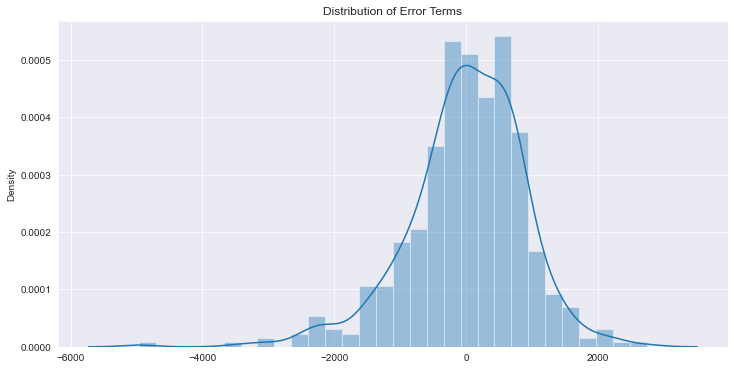

In [60]:
# Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

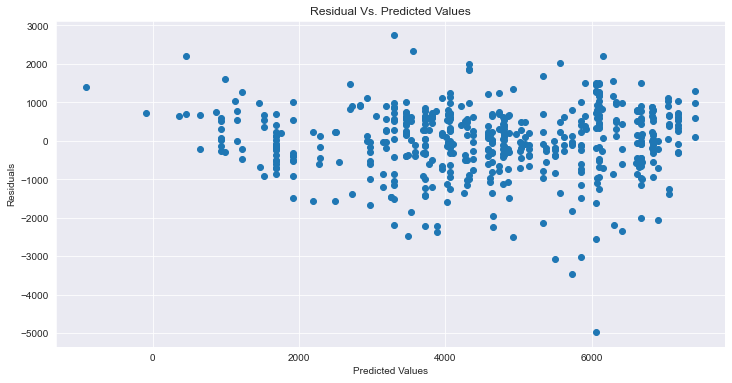

In [61]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

##### there are no specific pattern can be established as the values are sctattered with reference to predicted value. Error terms are independent to each other

## Looking for constant variance

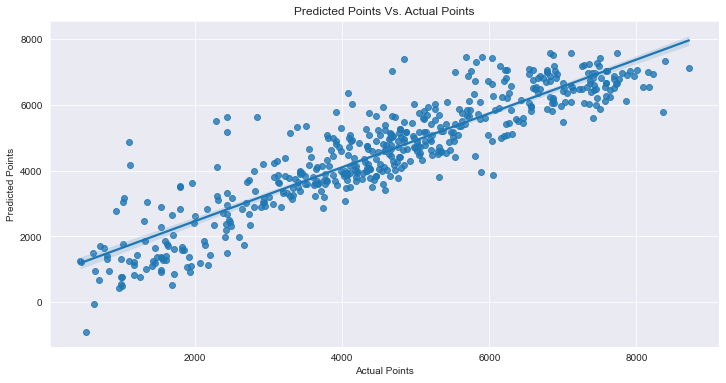

In [105]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

### Build a Model using RFE and Automated approach

In [113]:
# Use RFE to eliminate some columns
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [114]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [115]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 11),
 ('atemp', False, 9),
 ('hum', False, 15),
 ('windspeed', False, 13),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', False, 8),
 ('mnth_aug', False, 14),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 7),
 ('mnth_jan', False, 10),
 ('mnth_jul', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', False, 3),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 5),
 ('weekday_wed', False, 6),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

# Manual elimination
Function to build a model using statsmodel api


In [104]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

### Function to calculate VIFs and print them


In [119]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [120]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'season_spring', 'mnth_dec', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [121]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_feb', 'mnth_jan', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [122]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [123]:
X_train_rfe.shape

(511, 15)

# Build a model

In [124]:
# Model 1
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.70e-181
Time:                        15:01:24   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2557.4469    

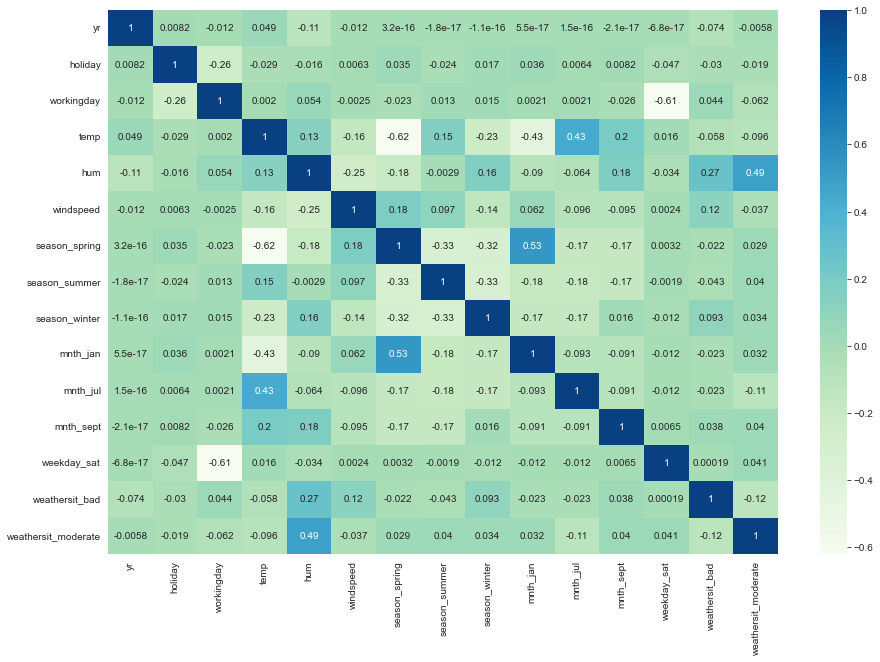

In [128]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikedata1[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

## MODEL 2

In [129]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.35e-182
Time:                        15:04:08   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2538.6933    

## MODEL 3 
All the columns have p-value > .05 so checking VIFs

In [130]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          3.37e-180
Time:                        15:05:35   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1751.3729    

### MODEL 4

In [131]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.51e-178
Time:                        15:06:13   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1590.6589    

### MODEL 5 

In [132]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          8.20e-179
Time:                        15:06:45   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1531.3301    

### MODEL 6

In [133]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          4.14e-147
Time:                        15:07:14   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5132.9563    

### Model 7

In [134]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.84e-92
Time:                        15:07:57   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3518.2486    

### MODEL 8

In [135]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.84e-92
Time:                        15:08:29   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3518.2486    

### model 9

In [136]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.75e-142
Time:                        15:09:07   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.6083    

### MODEL 10

In [137]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          3.20e-142
Time:                        15:09:59   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

### MODEL 11

In [138]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          9.73e-178
Time:                        15:10:57   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1447.1798    

##### Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.821 Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [87]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [88]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1447.1797605624479 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
   121.08726849]


### MODEL EVALUATION

In [141]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

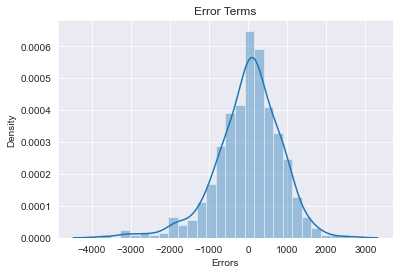

In [142]:
plot_res_dist(y_train, y_train_pred)

## Actual vs predicted test data

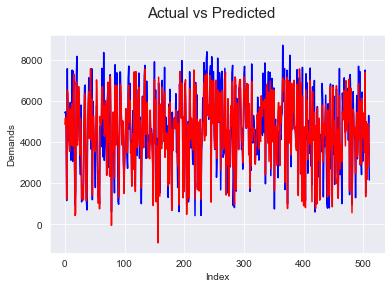

In [144]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok


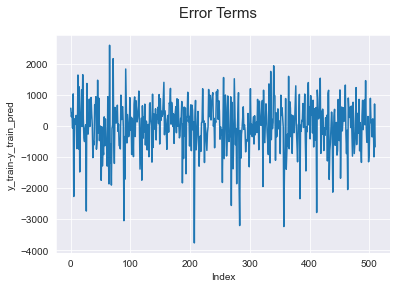

In [147]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Here,If we see the error terms are independent of each other.

In [145]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8158045196281631

## R2 Same as we obtained for our final model


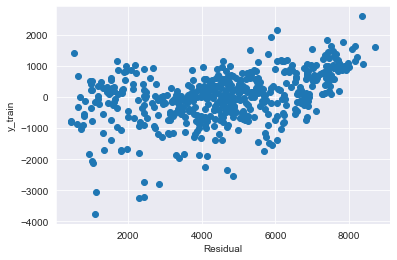

In [154]:
## Linearity check
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## Predict values for test data set

In [155]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [165]:
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [167]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

In [100]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

In [170]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          9.73e-178
Time:                        15:40:59   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.264e+13   9

## INTERPRETATION OF THE MODEL
Analysing the above model, the comapany should focus on the following features:
Company should focus on expanding business during Spring.
Company should focus on expanding business during September.
Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.